Jordan King

## Research question/interestsI want to examine the point distributions through the years and evaluate the impact that nationality may have on scores..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import csv

In [2]:
f1data = pd.read_csv("../f1data.csv")

In [3]:
f1data

,Pos,Driver,Nationality,Car,PTS,Year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950
...,...,...,...,...,...,...
1568,17,Kevin Magnussen MAG,DEN,Haas Ferrari,1.0,2020
1569,18,Kimi RÃ¤ikkÃ¶nen RAI,FIN,Alfa Romeo Racing Ferrari,0.0,2020
1570,19,Nicholas Latifi LAT,CAN,Williams Mercedes,0.0,2020
1571,20,George Russell RUS,GBR,Williams Mercedes,0.0,2020


In [4]:
## Milestone 3, Task 1

In [5]:
f1data.shape

(1573, 6)

In [6]:
# This lets me know that our data has 1573 rows of data with 6 keys.

In [7]:
f1data.columns

Index(['Pos', 'Driver', 'Nationality', 'Car', 'PTS', 'Year'], dtype='object')

In [8]:
f1data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PTS,Year
count,1573.000000,1573.000000
mean,27.207883,1985.148760
std,52.585197,20.744311
min,0.000000,1950.000000
25%,3.000000,1967.000000
50%,8.000000,1985.000000
75%,28.000000,2004.000000
max,413.000000,2020.000000


<AxesSubplot:xlabel='Year', ylabel='PTS'>

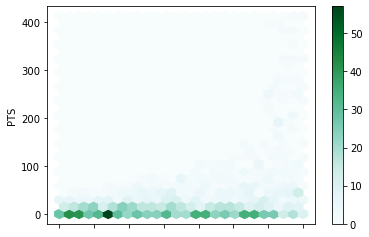

In [9]:
f1data.plot.hexbin(x="Year", y="PTS", gridsize=25)

In [10]:
# This graphs dramatically illustrates that the majority of drivers in F1 are very low scoring,
# and that rarely there are multiple high scoring drivers in a year.

<AxesSubplot:xlabel='Year'>

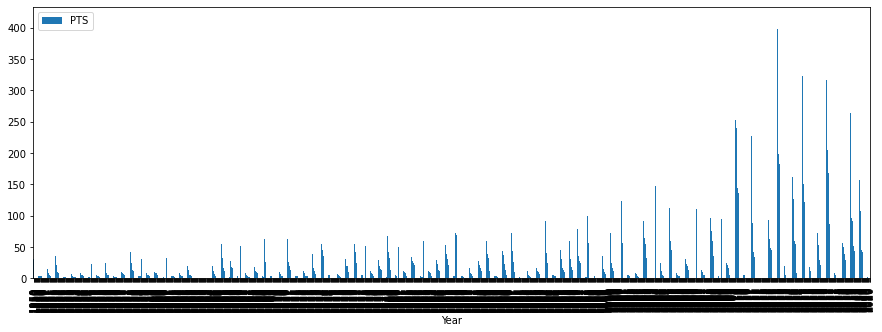

In [11]:
f1data.plot.bar(x="Year",y="PTS", figsize=(15,5))

In [12]:
# This graph clearly shows that in recent years, there have been more total points rewarded in series.
# This agrees to indications in our initial research showing that there have been more races added in recent years.

<AxesSubplot:xlabel='Nationality', ylabel='PTS'>

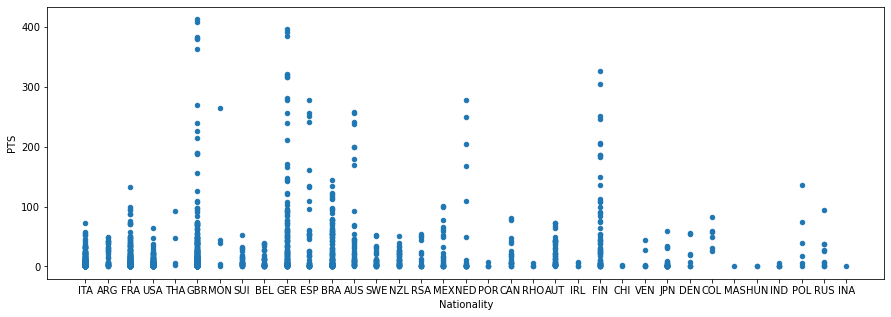

In [13]:
f1data.plot.scatter(x="Nationality", y="PTS", figsize=(15,5))

In [14]:
# This graph breaks down the all time points of all nationalities in F1 pointing towards those which have scored
# the most points.

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

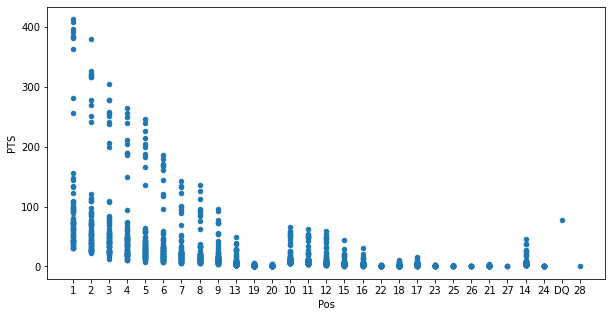

In [15]:
f1data.plot.scatter(x="Pos", y="PTS", figsize=(10,5))

In [16]:
# This graph displays the total points scored by the varying positions each year. It should be noted that since
# there is not a fixed number of racers every year, there are some positions that will not have scores each year.
# There is notably a special consideration of a DQ, disqualification, one year.

In [17]:
## Milestone 3, Task 2

In [18]:
f1data.rename(columns={"Car": "Team", "Pos": "Position"}, inplace=True)

In [19]:
#Checking to see if there are any null values.
f1data.isnull().any(axis=None)
print("Preview of data with null values:")
print(f1data[f1data.isnull().any(axis=1)])
plt.show()

#Replacing the found null values in Team with Independant to accurately represent information.
f1data["Team"].fillna("Independant", inplace=True)

Preview of data with null values:
    Position                  Driver Nationality Team   PTS  Year
16        13     Dorino Serafini SER         ITA  NaN   3.0  1950
17        13  Philippe Etancelin ETA         FRA  NaN   3.0  1950
21        20      Eugene Chaboud CHA         FRA  NaN   1.0  1950
35        12        Louis Rosier ROS         FRA  NaN   3.0  1951
53        13         Ken Wharton WHA         GBR  NaN   3.0  1952
309       18      Masten Gregory GRE         USA  NaN   0.0  1963
314       18       Mike Hailwood HAI         GBR  NaN   0.0  1963
446       13     Richard Attwood ATT         GBR  NaN   3.0  1969
478        2     Ronnie Peterson PET         SWE  NaN  33.0  1971
492       16        Mark Donohue DON         USA  NaN   4.0  1971
493       16     Henri Pescarolo PES         FRA  NaN   4.0  1971


In [20]:
f1data.loc[16,:]

Position                        13
Driver         Dorino Serafini SER
Nationality                    ITA
Team                   Independant
PTS                            3.0
Year                          1950
Name: 16, dtype: object

In [21]:
# Checking dataframe for missing values. Since all missing values exist under team, 
# we completed this data by replacing NaN with "Independant" and then confirmed that this worked.

In [22]:
duplicateRowsDF = f1data[f1data.duplicated()]
if duplicateRowsDF.empty:
    print("There are no duplicates."),
else:
    print("Duplicate Rows except first occurrence based on all columns are:")
    print(duplicateRowsDF)

There are no duplicates.


In [23]:
# Confirming what the current delimiter for our data is
sniffer = csv.Sniffer()
dialect = sniffer.sniff("first, second, third, fourth")
print(dialect.delimiter)

,


In [24]:
# Correcting the incorrect formatting of Kimi's name
f1data["Driver"] = f1data["Driver"].replace(["Kimi RÃ¤ikkÃ¶nen RAI"],"Kimi Räikkönen RAI")

In [27]:
#This code seperated the Driver ID from the Driver.
f1data["Driver_ID"] = f1data["Driver"].str[-3:]
f1data["Driver2"] = f1data["Driver"].str[:-3]
f1data = f1data.drop(columns=["Driver"])
f1data.rename(columns={"Driver2": "Driver"}, inplace=True)

In [28]:
#This reorgnaizes
f1data = f1data[["Driver", "Driver_ID", "Team", "Nationality", "PTS", "Position", "Year"]]
f1data

,Driver,Driver_ID,Team,Nationality,PTS,Position,Year
0,Nino Fari,na,Alfa Romeo,ITA,30.0,1,1950
1,Juan Manuel Fang,io,Alfa Romeo,ARG,27.0,2,1950
2,Luigi Fagio,li,Alfa Romeo,ITA,24.0,3,1950
3,Louis Rosi,er,Talbot-Lago,FRA,13.0,4,1950
4,Alberto Asca,ri,Ferrari,ITA,11.0,5,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnuss,en,Haas Ferrari,DEN,1.0,17,2020
1569,Kimi Räikkön,en,Alfa Romeo Racing Ferrari,FIN,0.0,18,2020
1570,Nicholas Lati,fi,Williams Mercedes,CAN,0.0,19,2020
1571,George Russe,ll,Williams Mercedes,GBR,0.0,20,2020


In [ ]:
## Milestone 3, Task 3

In [30]:
def load_and_process(csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(csv_file)
        .rename(columns={"Car": "Team", "Pos": "Position"})
        .fillna("Independant")
        .replace(["Kimi RÃ¤ikkÃ¶nen RAI"],"Kimi Räikkönen RAI")
        
        )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
        df1
        .assign(Driver_ID = df1["Driver"].str[-3:],Driver2 = df1["Driver"].str[:-3])
        .drop(columns=["Driver"])
        .rename(columns={"Driver2": "Driver"})
        [["Driver", "Driver_ID", "Team", "Nationality", "PTS", "Position", "Year"]]
      )

    # Make sure to return the latest dataframe

    return df2 


load_and_process("../f1data.csv")

,Driver,Driver_ID,Team,Nationality,PTS,Position,Year
0,Nino Farina,FAR,Alfa Romeo,ITA,30.0,1,1950
1,Juan Manuel Fangio,FAN,Alfa Romeo,ARG,27.0,2,1950
2,Luigi Fagioli,FAG,Alfa Romeo,ITA,24.0,3,1950
3,Louis Rosier,ROS,Talbot-Lago,FRA,13.0,4,1950
4,Alberto Ascari,ASC,Ferrari,ITA,11.0,5,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,Haas Ferrari,DEN,1.0,17,2020
1569,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,FIN,0.0,18,2020
1570,Nicholas Latifi,LAT,Williams Mercedes,CAN,0.0,19,2020
1571,George Russell,RUS,Williams Mercedes,GBR,0.0,20,2020
